In [1]:
from glob import glob
import pandas as pd
import os

In [2]:
measure_list = glob("*measures.csv")
measure_list

['logisticregression_experiment02_measures.csv',
 'logisticregression_experiment09_measures.csv',
 'logisticregression_experiment07_measures.csv',
 'logisticregression_experiment03_measures.csv',
 'logisticregression_experiment01_measures.csv',
 'logisticregression_experiment08_measures.csv',
 'logisticregression_experiment04_measures.csv',
 'logisticregression_experiment05_measures.csv',
 'logisticregression_experiment10_measures.csv',
 'logisticregression_experiment06_measures.csv']

In [3]:
# Read and merge all dataframes
data_frames = [pd.read_csv(file_name) for file_name in measure_list]
merged_df = pd.concat(data_frames, ignore_index=True)
merged_df = merged_df.sort_values(by="Experiment_Number").reset_index(drop=True)
merged_df.to_csv("logisticsregression_experiments_summary.csv",index=False)
merged_df

,Model,Seed,Experiment_Number,Accuracy,AUC,F1_Score
0,logisticregression,315491657,1,0.743590,0.776389,0.666667
1,logisticregression,135304577,2,0.604396,0.603636,0.437500
2,logisticregression,1572185508,3,0.822222,0.860082,0.733333
3,logisticregression,1029933563,4,0.770115,0.849607,0.655172
4,logisticregression,1950160822,5,0.800000,0.910053,0.666667
5,logisticregression,563269619,6,0.702703,0.681226,0.666667
6,logisticregression,1573902777,7,0.726190,0.698980,0.634921
7,logisticregression,513873336,8,0.662338,0.695385,0.518519
8,logisticregression,442822283,9,0.729412,0.769704,0.549020
9,logisticregression,1770168448,10,0.793103,0.870013,0.727273


In [4]:
model_name = merged_df.Model.unique()[0]
model_name

if model_name == 'xgboost':
    model_display = "XGBoost"
elif model_name == "randomforest":
    model_display = "Random Forest"
else:
    model_display = "Logistics Regression"

model_display

'Logistics Regression'

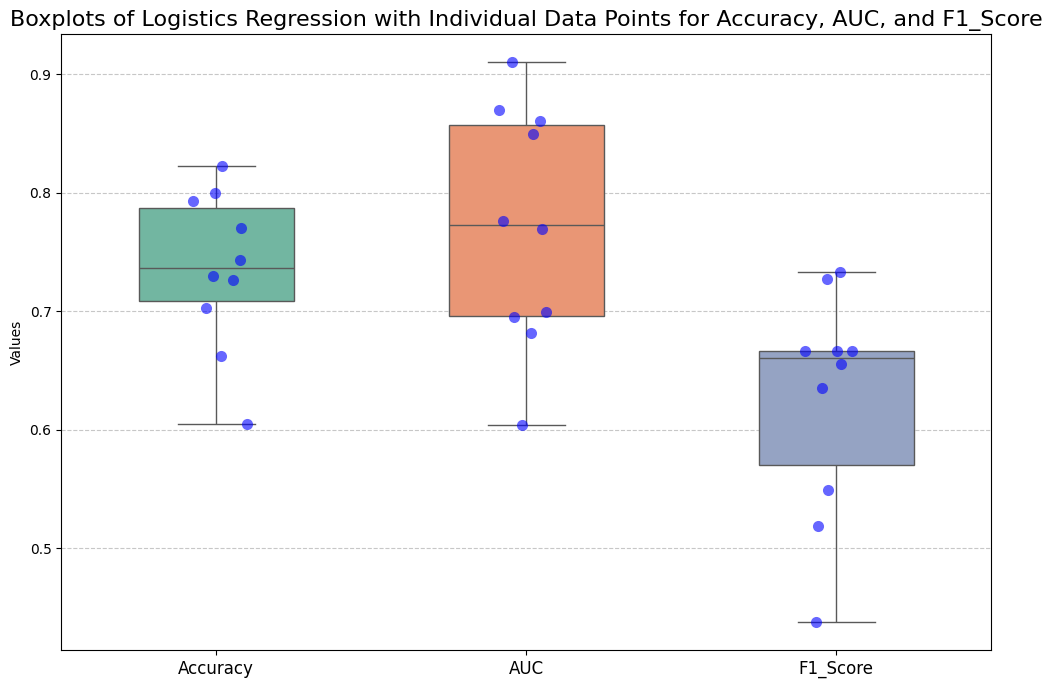

In [5]:
# Create boxplots with individual data points (dots) overlaid
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected code to fix palette issue and display boxplots with dots
plt.figure(figsize=(12, 8))

# Boxplot for Accuracy, AUC, and F1_Score
sns.boxplot(data=merged_df[['Accuracy', 'AUC', 'F1_Score']], width=0.5, palette="Set2")

# Overlay individual data points (dots)
sns.stripplot(data=merged_df[['Accuracy', 'AUC', 'F1_Score']], color='blue', size=8, alpha=0.6, jitter=True)

# Customize the plot
plt.title(f'Boxplots of {model_display} with Individual Data Points for Accuracy, AUC, and F1_Score', fontsize=16)
plt.ylabel('Values')
plt.xticks(ticks=[0, 1, 2], labels=['Accuracy', 'AUC', 'F1_Score'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

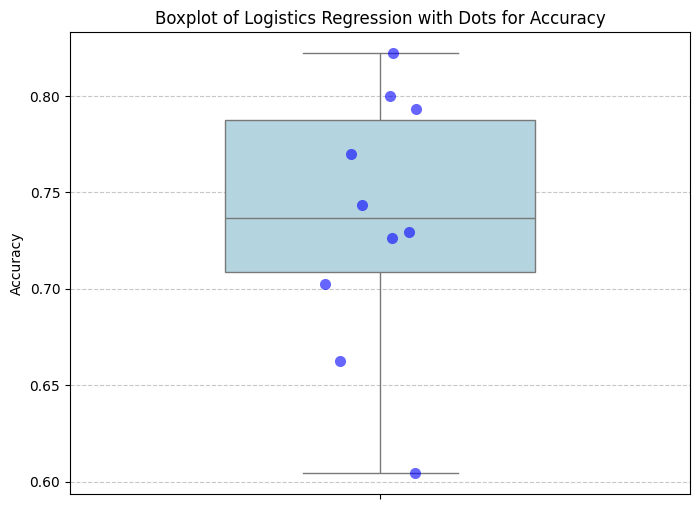

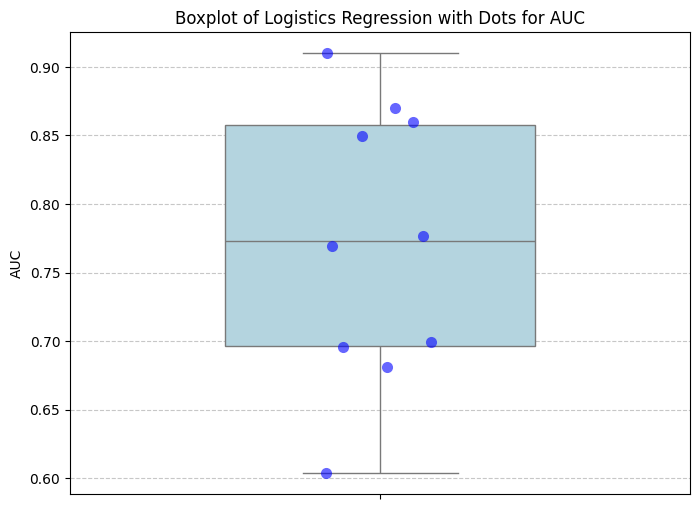

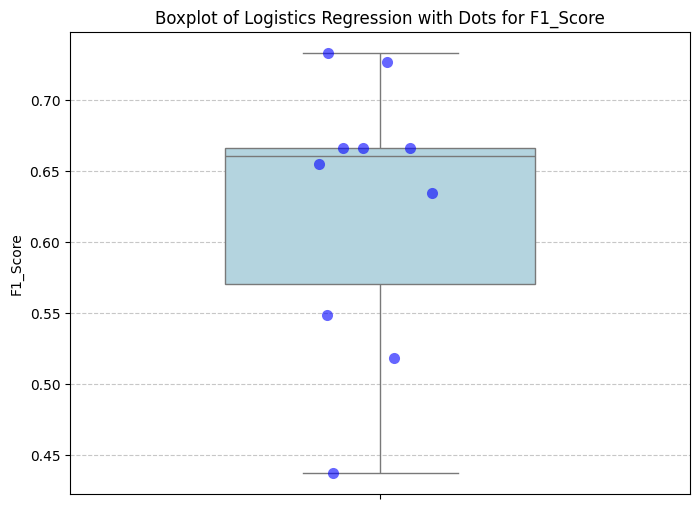

In [6]:
# Create boxplots with individual data points (dots) overlaid
import seaborn as sns

for column in ['Accuracy', 'AUC', 'F1_Score']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=merged_df, y=column, color='lightblue', width=0.5)
    sns.stripplot(data=merged_df, y=column, color='blue', size=8, alpha=0.6, jitter=True)
    plt.title(f'Boxplot of {model_display} with Dots for {column}')
    plt.ylabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()